In [41]:
#setting things up for YOLO
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 17.94 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 16.0 MB/s eta 0:00:00


In [53]:
# running YOLO on a sample image
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/images/2.png --name cricket_test
# !python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/images/2.png --name cricket_test
# !python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/images/3.png --name cricket_test

detect: weights=['yolov5s.pt'], source=/content/images/2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=cricket_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/images/2.png: 256x640 4 persons, 1 sports ball, 165.1ms
Speed: 1.5ms pre-process, 165.1ms inference, 2.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/cricket_test4


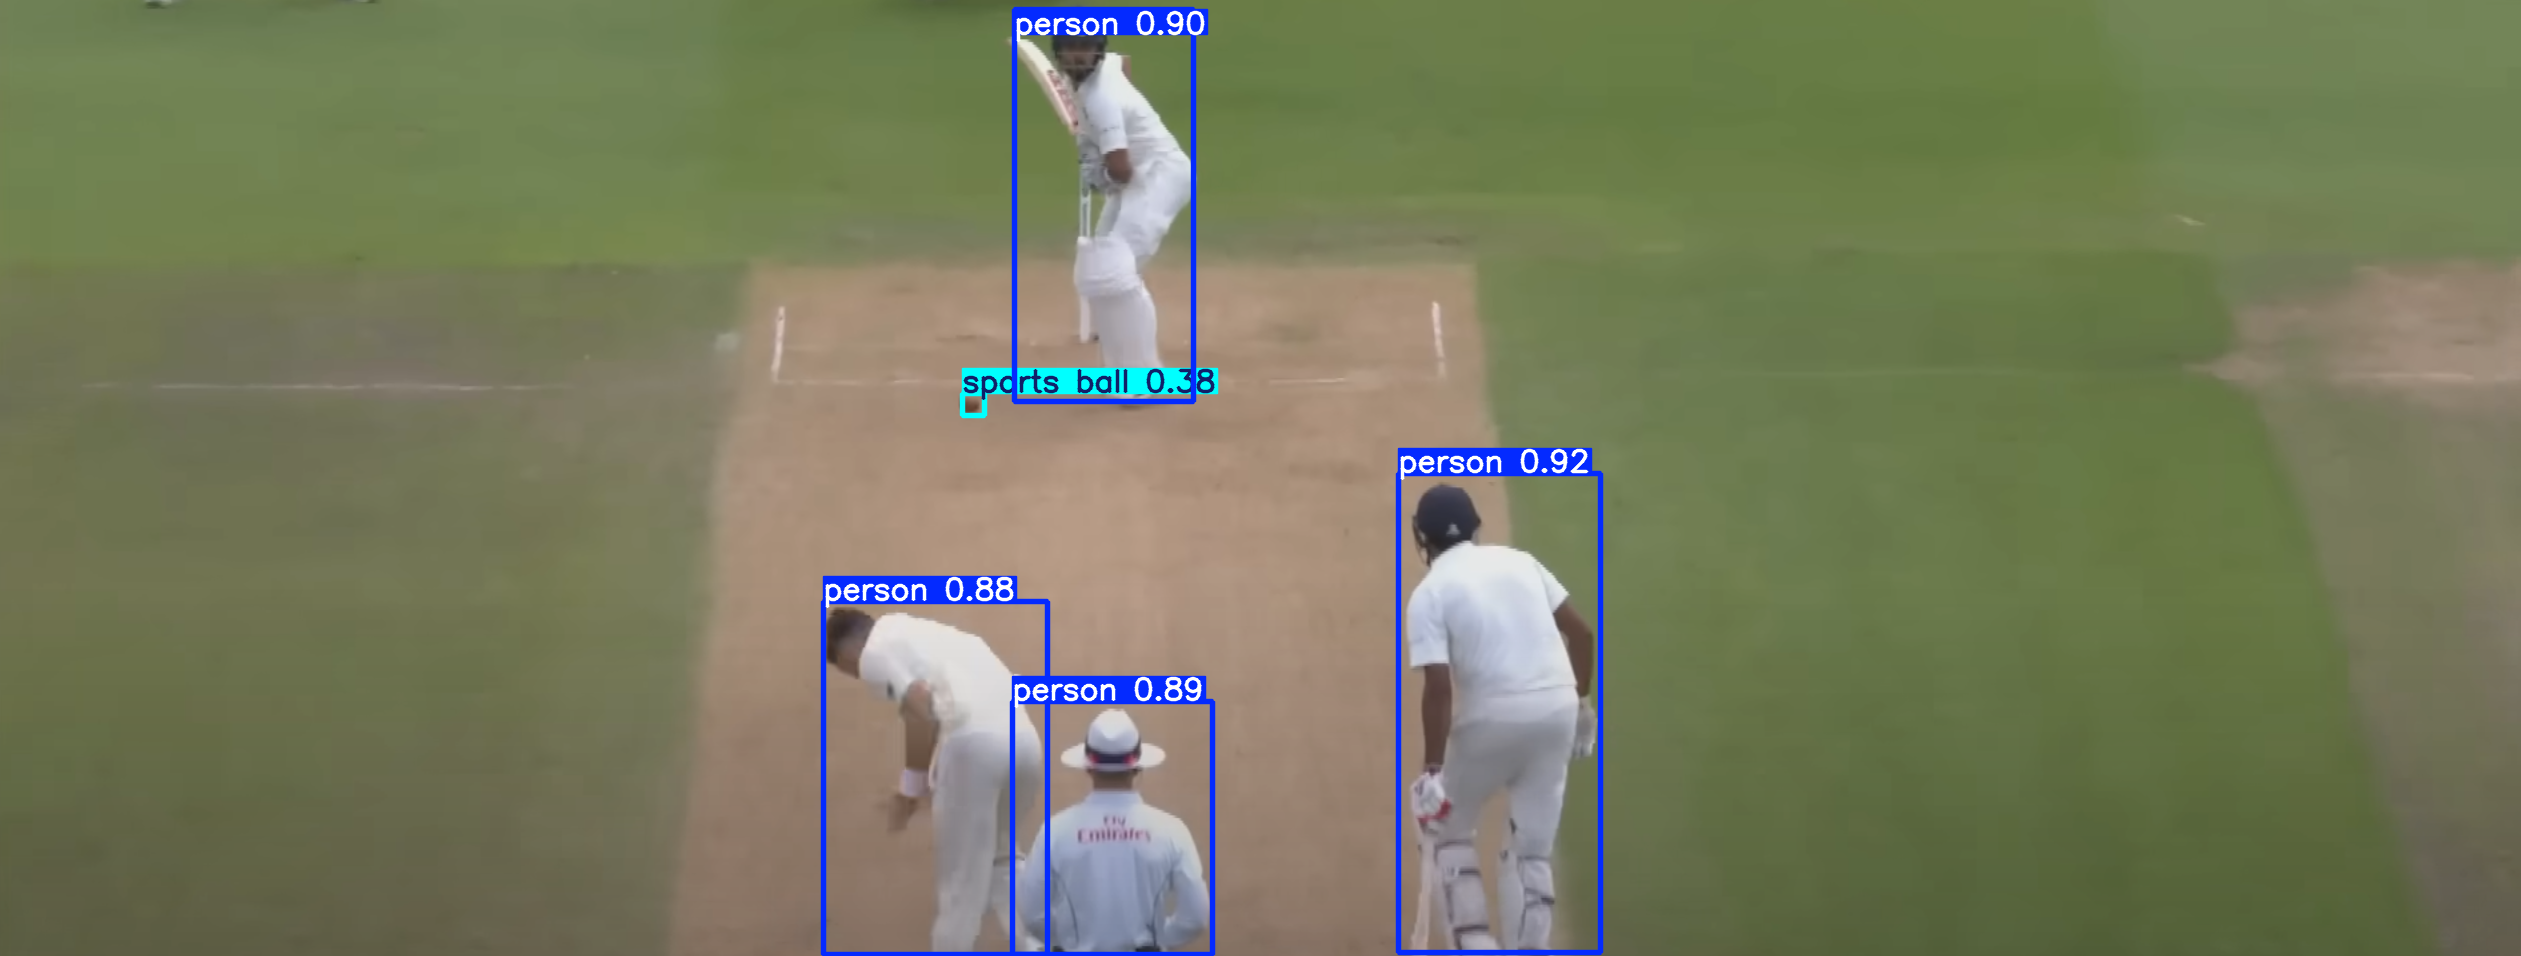

In [54]:
import shutil
import glob

latest_folder = sorted(glob.glob('runs/detect/cricket_test*'))[-1]
shutil.move(f"{latest_folder}/2.png", "/content/images/2_yolo.png")

from IPython.display import Image, display
display(Image(filename='/content/images/2_yolo.png'))

**Regression based verification - simulation**

In [49]:
import numpy as np
import pandas as pd

# Constants
g = 9.8
bounce_efficiency = 0.5
pitch_distance = 20.12

# Function to calculate final positions based on initial conditions
def calculate_final_position(initial_x, initial_y, initial_z, initial_velocity, initial_angle):
    v_x = initial_velocity * np.cos(np.radians(initial_angle))
    v_y = initial_velocity * np.sin(np.radians(initial_angle))
    v_z = initial_velocity * np.sin(np.radians(initial_angle))

    t_to_pitch = pitch_distance / np.sqrt(v_x**2 + v_y**2)

    final_x = initial_x + v_x * t_to_pitch
    final_y = initial_y + v_y * t_to_pitch
    final_z = initial_z + v_z * t_to_pitch - 0.5 * g * t_to_pitch ** 2

    v_z_bounce = bounce_efficiency * v_z

    t_to_peak = v_z_bounce / g
    final_z_bounce = v_z_bounce * t_to_peak - 0.5 * g * t_to_peak ** 2

    return final_x, final_y, final_z + final_z_bounce

# Generate synthetic dataset
num_samples = 100
data = []

np.random.seed(0)

for _ in range(num_samples):
    initial_x = np.random.uniform(-5, 5)
    initial_y = np.random.uniform(-5, 5)
    initial_z = np.random.uniform(1.0, 2.5)
    initial_velocity = np.random.uniform(25, 35)
    initial_angle = np.random.uniform(10, 45)

    final_x, final_y, final_z = calculate_final_position(initial_x, initial_y, initial_z, initial_velocity, initial_angle)

    data.append({
        'initial_x': initial_x,
        'initial_y': initial_y,
        'initial_z': initial_z,
        'initial_velocity': initial_velocity,
        'initial_angle': initial_angle,
        'final_x': final_x,
        'final_y': final_y,
        'final_z': final_z
    })

df = pd.DataFrame(data)

df.to_csv("cricket_ball_trajectory_dataset_with_nonzero_xy.csv", index=False)

print(df.head())


   initial_x  initial_y  initial_z  initial_velocity  initial_angle  \
0   0.488135   2.151894   1.904145         30.448832      24.827918   
1   1.458941  -0.624128   2.337660         34.636628      23.420453   
2   2.917250   0.288949   1.852067         34.255966      12.486262   
3  -4.128707  -4.797816   2.248930         32.781568      40.450425   
4   4.786183   2.991586   1.692219         32.805292      14.139605   

     final_x    final_y    final_z  
0  18.748504  10.600168  10.297923  
1  19.921311   7.373079  11.099007  
2  22.561370   4.639004   5.211425  
3  11.181961   8.255836  19.226425  
4  24.296616   7.906607   5.583232  


Mean Squared Error for final_x: 0.7020949852952934
Mean Squared Error for final_y: 3.7205720197763754
Mean Squared Error for final_z: 0.7836253971727568


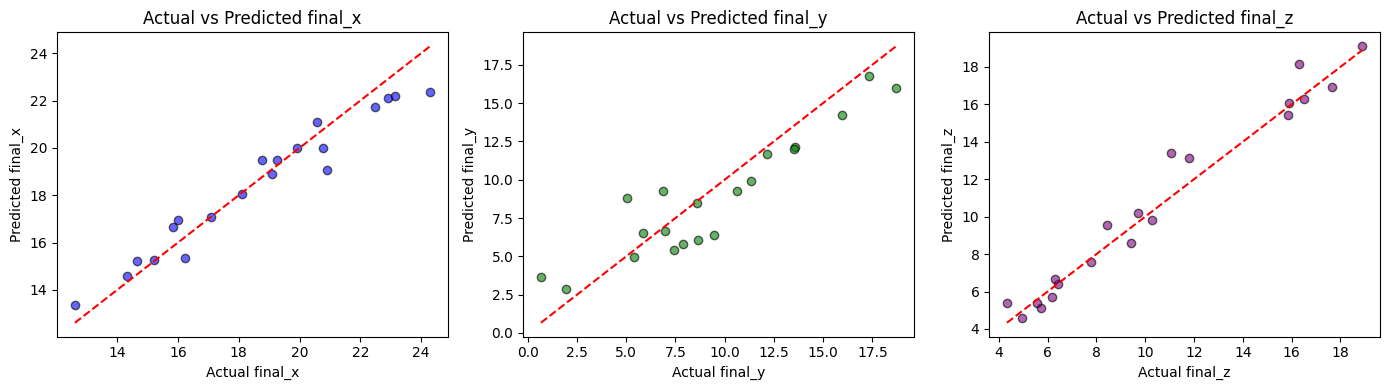

   Actual final_x  Predicted final_x  Actual final_y  Predicted final_y  \
0       14.660039          15.225393        6.867145           9.259807   
1       20.779064          19.999152        6.950641           6.681950   
2       19.092706          18.881664        5.036109           8.818874   
3       20.891601          19.065252       13.581472          12.153039   
4       20.581545          21.080231        9.439972           6.388418   

   Actual final_z  Predicted final_z  
0       11.077020          13.385946  
1        9.723425          10.217155  
2       11.815073          13.136775  
3       16.492516          16.281454  
4        6.418912           6.388512  


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("cricket_ball_trajectory_dataset_with_nonzero_xy.csv")

X = df[['initial_x', 'initial_y', 'initial_z', 'initial_velocity', 'initial_angle']]
y = df[['final_x', 'final_y', 'final_z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse_x = mean_squared_error(y_test['final_x'], y_pred[:, 0])
mse_y = mean_squared_error(y_test['final_y'], y_pred[:, 1])
mse_z = mean_squared_error(y_test['final_z'], y_pred[:, 2])

print(f"Mean Squared Error for final_x: {mse_x}")
print(f"Mean Squared Error for final_y: {mse_y}")
print(f"Mean Squared Error for final_z: {mse_z}")


plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test['final_x'], y_pred[:, 0], color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test['final_x'].min(), y_test['final_x'].max()], [y_test['final_x'].min(), y_test['final_x'].max()], 'r--')
plt.xlabel("Actual final_x")
plt.ylabel("Predicted final_x")
plt.title("Actual vs Predicted final_x")

plt.subplot(1, 3, 2)
plt.scatter(y_test['final_y'], y_pred[:, 1], color='green', alpha=0.6, edgecolor='k')
plt.plot([y_test['final_y'].min(), y_test['final_y'].max()], [y_test['final_y'].min(), y_test['final_y'].max()], 'r--')
plt.xlabel("Actual final_y")
plt.ylabel("Predicted final_y")
plt.title("Actual vs Predicted final_y")

plt.subplot(1, 3, 3)
plt.scatter(y_test['final_z'], y_pred[:, 2], color='purple', alpha=0.6, edgecolor='k')
plt.plot([y_test['final_z'].min(), y_test['final_z'].max()], [y_test['final_z'].min(), y_test['final_z'].max()], 'r--')
plt.xlabel("Actual final_z")
plt.ylabel("Predicted final_z")
plt.title("Actual vs Predicted final_z")

plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame({
    'Actual final_x': y_test['final_x'].values,
    'Predicted final_x': y_pred[:, 0],
    'Actual final_y': y_test['final_y'].values,
    'Predicted final_y': y_pred[:, 1],
    'Actual final_z': y_test['final_z'].values,
    'Predicted final_z': y_pred[:, 2]
})

print(comparison_df.head())
